In [1]:
# =====================================================================================
# PROBLEM A2
#
# Build a Neural Network Model for Horse or Human Dataset.
# The test will expect it to classify binary classes.
# Your input layer should accept 150x150 with 3 bytes color as the input shape.
# Don't use lambda layers in your model.
#
# The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).
#
# Desired accuracy and validation_accuracy > 83%
# ======================================================================================

In [1]:

import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
#const
batch_size = 32
img_height = 150
img_width = 150
AUTOTUNE = tf.data.AUTOTUNE

In [4]:
#Get Data
data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')

data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [3]:
#Specify path for data training and validation
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR= 'data/validation-horse-or-human'

In [4]:
#Image augmentatiom
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=5,  # rotation
                                width_shift_range=0.2,  # horizontal shift
                                zoom_range=0.2,  # zoom
                                horizontal_flip=True,  # horizontal flip
                                brightness_range=[0.2,0.8])  # brightness

val_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_gen= train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen= val_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
#get classes name
targets=list(val_gen.class_indices.keys())

Text(2, 10, 'horses')

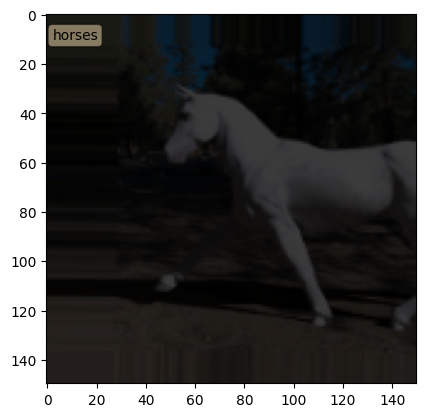

In [73]:
yessir=next(iter(train_gen))
plt.imshow(yessir[0][0])
plt.text(2,10, targets[int(yessir[1][0])], bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [ ]:
#Callback
class mycustomcallback(tf.keras.callbacks.Callback):
    def __init__(self, eachiter=1, target, condition=["lower", "higher"]):
        super(mycustomcallback, self).__init__()
        self.eachiter=eachiter
        self.condition=condition
        self.target=target
        self.epochs=0
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epochs+=1
        
    def on_epoch_end(self, epoch, logs=None):
        return super().on_epoch_end(epoch, logs)

In [17]:
def getmodel():
    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), input_shape=train_gen.image_shape, activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop, loss=tf.keras.losses.binary_crossentropy, metrics=tf.keras.metrics.binary_accuracy)
    
    return model

In [18]:
model=getmodel()
model.fit(train_gen, validation_data=val_gen, batch_size=batch_size, epochs=10)

Epoch 1/10
33/33 [==============================] - 19s 542ms/step - loss: 2.0872 - binary_accuracy: 0.6193 - val_loss: 1.7200 - val_binary_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 14s 408ms/step - loss: 0.6161 - binary_accuracy: 0.6777 - val_loss: 2.6854 - val_binary_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 14s 415ms/step - loss: 0.5160 - binary_accuracy: 0.7712 - val_loss: 2.6587 - val_binary_accuracy: 0.5078
Epoch 4/10
33/33 [==============================] - 14s 432ms/step - loss: 0.4016 - binary_accuracy: 0.8228 - val_loss: 2.6299 - val_binary_accuracy: 0.5352
Epoch 5/10
 5/33 [===>..........................] - ETA: 11s - loss: 0.4781 - binary_accuracy: 0.7875

KeyboardInterrupt: 